# Pymaceuticals Inc.
---

### Analysis

- In the bar grapsh we can observe that there are more mice under the drug regimen of Capomulin.
- The majority of the box plots show a negative skew meaning that most of the values of the tumors are on de right side of the mean, showin the regimen of Capomulin and Ramicane have a higher effectivity when treating tumors. We can also see this result in the standard deviation since both have the lowest results of Std. Err. from all the regimen     
- The positive correlation of the weight and the tumor volume show that as the weigth of the mouse increases so does the volume, and viceversa.  
- The population of mice show that there were more males tested. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset:
drug_results= pd.merge(mouse_metadata, study_results, on = "Mouse ID")
results = drug_results


# Rename the 'Age_months' column:
Results = results.rename(columns = {"Age_months":"Age (months)"})
results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
number_mice = results["Mouse ID"].nunique()
number_mice

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_id = results.loc[results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_id

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice_id = results.loc[results["Mouse ID"] == "g989", :]
all_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_mice = results[results['Mouse ID'].isin(mice_id)==False]
data_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice_2 = data_mice["Mouse ID"].nunique()
number_mice_2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_by = data_mice.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
v_mean = group_by['Tumor Volume (mm3)'].mean()

v_median = group_by['Tumor Volume (mm3)'].median()

v_variance = group_by['Tumor Volume (mm3)'].var()

v_sd = group_by['Tumor Volume (mm3)'].std()

v_sem = group_by['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary = pd.DataFrame({
    'Mean Tumor Volume': v_mean,
    'Median Tumor Volume': v_median,
    'Tumor Volume Variance': v_variance,
    'Tumor Volume Std. Dev.': v_sd,
    'Tumor Volume Std. Err.': v_sem
})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

aggregation =  data_mice.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

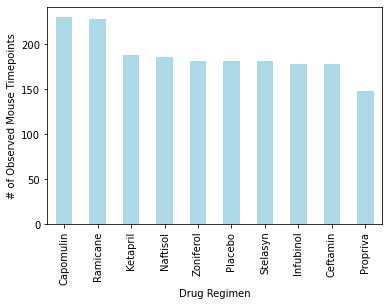

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observed = data_mice["Drug Regimen"].value_counts()
bar_plot = observed.plot.bar(color = 'lightblue') 

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

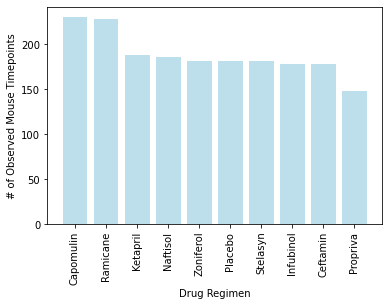

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = observed.index.values
y = observed.values

plt.bar(x, y, color = 'lightblue', alpha = 0.8, align = 'center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")

plt.show()


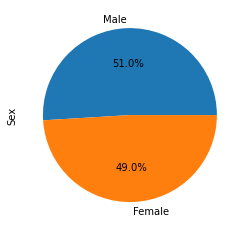

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

m_f = data_mice["Sex"].value_counts()
m_f.plot.pie(autopct= "%1.1f%%")
plt.show()


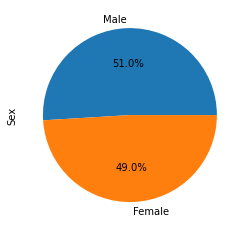

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49, 50]
plot = m_f.plot.pie(y =' Total Count', autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Cap = data_mice.loc[data_mice["Drug Regimen"] == "Capomulin",:]
Ram = data_mice.loc[data_mice["Drug Regimen"] == "Ramicane", :]
Inf = data_mice.loc[data_mice["Drug Regimen"] == "Infubinol", :]
Cef = data_mice.loc[data_mice["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Cap_last = Cap.groupby('Mouse ID').max()['Timepoint']
Cap_vol = pd.DataFrame(Cap_last)
Cap_merge = pd.merge(Cap_vol, data_mice, on = ("Mouse ID","Timepoint"), how = "left")
Cap_tumors = Cap_merge["Tumor Volume (mm3)"]

Ram_last = Ram.groupby('Mouse ID').max()['Timepoint']
Ram_vol = pd.DataFrame(Ram_last)
Ram_merge = pd.merge(Ram_vol, data_mice, on=("Mouse ID","Timepoint"), how = "left")
Ram_merge.to_csv("output.csv")
Ram_tumors = Ram_merge["Tumor Volume (mm3)"]

Inf_last = Inf.groupby('Mouse ID').max()['Timepoint']
Inf_vol = pd.DataFrame(Inf_last)
Inf_merge = pd.merge(Inf_vol, data_mice, on=("Mouse ID","Timepoint"), how = "left")
Inf_tumors = Inf_merge["Tumor Volume (mm3)"]

Cef_last = Cef.groupby('Mouse ID').max()['Timepoint']
Cef_vol = pd.DataFrame(Cef_last)
Cef_merge = pd.merge(Cef_vol, data_mice, on=("Mouse ID","Timepoint"),how = "left")
Cef_tumors = Cef_merge["Tumor Volume (mm3)"]




In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds
    
quart = Cap_tumors.quantile([.25,.5,.75])
lower = quart[0.25]
upper = quart[0.75]
iqr = upper-lower

lowerb = lower - (1.5*iqr)
upperb = upper + (1.5*iqr)

quart = Ram_tumors.quantile([.25,.5,.75])
lower = quart[0.25]
upper = quart[0.75]
iqr = upper-lower

lowerb = lower - (1.5*iqr)
upperb = upper + (1.5*iqr)

quart = Inf_tumors.quantile([.25,.5,.75])
lower = quart[0.25]
upper = quart[0.75]
iqr = upper-lower

lowerb = lower - (1.5*iqr)
upperb = upper + (1.5*iqr)

quart = Cef_tumors.quantile([.25,.5,.75])
lower = quart[0.25]
upper = quart[0.75]
iqr = upper-lower

lowerb = lower - (1.5*iqr)
upperb = upper + (1.5*iqr)


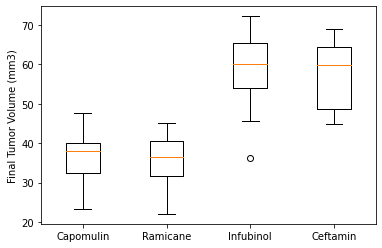

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [Cap_tumors, Ram_tumors, Inf_tumors, Cef_tumors]
x = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(box_plot, labels = x, widths = 0.4, vert = True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

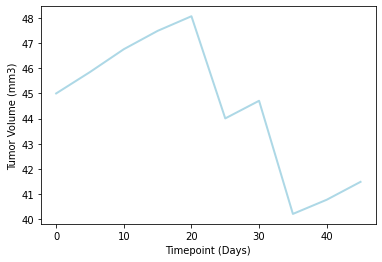

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot = Cap.loc[Cap["Mouse ID"] == "l509",:]
x = line_plot["Timepoint"]
y = line_plot["Tumor Volume (mm3)"]

plt.plot(x, y, linewidth = 2, color = "lightblue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

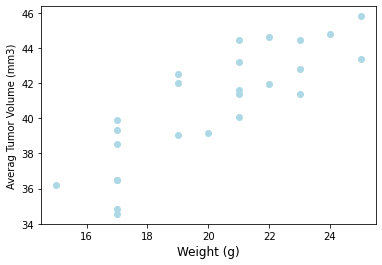

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot =Cap.groupby(['Mouse ID']).mean()

plt.scatter(scatter_plot['Weight (g)'],scatter_plot['Tumor Volume (mm3)'], color = "lightblue")
plt.xlabel('Weight (g)',fontsize = 12)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


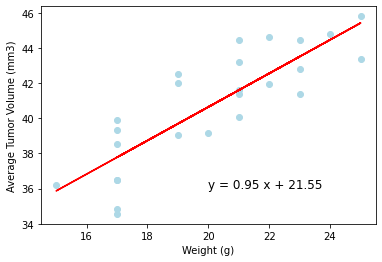

In [53]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(scatter_plot['Weight (g)'],scatter_plot['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"])
reg = scatter_plot["Weight (g)"]* slope + intercept
equation = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(scatter_plot["Weight (g)"],scatter_plot["Tumor Volume (mm3)"],color = 'lightblue')
plt.plot(scatter_plot["Weight (g)"], reg, color = 'red')
plt.annotate(equation,(20,36), fontsize = 12)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [47]:
print(f'Thanks for watching')

Thanks for watching
